<a href="https://colab.research.google.com/github/Kristian-Abad/Netflix-Movies-Project/blob/main/Netflix_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [341]:
import numpy as np
import pandas as pd

# Importing the data

The data comes from [this Kaggle dataset.](https://www.kaggle.com/datasets/amjaads/netflix-movies?resource=download)

In [342]:
data = pd.read_csv('Netflix_movies.csv')

# Exploring our data

In [343]:
data.head()

,Unnamed: 0,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,1,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,4,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,5,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,7,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,9,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"


In [344]:
data.loc[:,'Unnamed: 0']

0          1
1          4
2          5
3          7
4          9
        ... 
3318    3892
3319    3893
3320    3894
3321    3895
3322    3896
Name: Unnamed: 0, Length: 3323, dtype: int64

We're going to need to deal with this column later.

In [345]:
data.shape

(3323, 10)

Okay so we're dealing with a dataframe with 3,323 records across 10 variables.

In [346]:
data.isna().any()

Unnamed: 0          False
movie_name          False
Duration            False
year                False
genre               False
director            False
actors              False
country             False
rating              False
enter_in_netflix    False
dtype: bool

Looks like we are fortunate enough to not have any missing values.

In [347]:
data = data.rename(columns={"Unnamed: 0" : "index"})
data.head()

,index,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,1,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,4,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,5,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,7,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,9,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"


Since the now index column is non-monotonic let's just drop it.

In [348]:
data = data.drop(columns='index')
# Verifying we have dropped the 'index' column
data.head()

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"


In [349]:
data[data.genre == 'Comedies'].head()

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
61,A Bad Moms Christmas,104,2017,Comedies,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China",5.6,"February 14, 2020"
77,A Futile and Stupid Gesture,102,2018,Comedies,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,6.8,"January 26, 2018"
107,A Thousand Words,92,2012,Comedies,Brian Robbins,"Eddie Murphy, Kerry Washington, Cliff Curtis, ...",United States,5.9,"July 1, 2020"
149,Adventures in Public School,86,2018,Comedies,Kyle Rideout,"Daniel Doheny, Judy Greer, Siobhan Williams, R...","Canada, United States",5.8,"August 15, 2018"


It looks like the genres are sorted alphabetically in a given genre cell.


Say you are deciding between keeping different streaming services and are wondering besides platform exclusives, what makes Netflix lucrative from a data driven standpoint?:

Tentative specific questions:
*   How are genres distributed? And by year?
*   What can be said about movies from other countries?
*   How recent does Netflix put in movies or equivalently what is the difference in year when movies are produced and entered into Netflix? What is the frequency of those differences?

Other questions possibly for a concluding discussion section
*   What does it's catalogue of movies have to offer?
*   What can be said about the quality of movies for Netflix customers?






Let's explore the data by genre a bit more ignoring genre overlap (i.e. having more than 1 genre for a given movie):

In [366]:
pd.set_option('max_rows', 10)

Here we use keywords from genres currently listed on Netflix's website as of 8/31/2022

In [367]:
print('Action:',data[data.genre.str.contains('Action')].shape,
      '\nAnime:',data[data.genre.str.contains('Anime')].shape,
      '\nBlack:',data[data.genre.str.contains('Black')].shape,
      '\nChildren:',data[data.genre.str.contains('Children')].shape,
      '\nClassics:',data[data.genre.str.contains('Classics')].shape,
      '\nComedies:',data[data.genre.str.contains('Comedies')].shape,
      '\nCrime:',data[data.genre.str.contains('Crime')].shape,
      '\nCult:',data[data.genre.str.contains('Cult')].shape,
      '\nDocumentaries',data[data.genre.str.contains('Documentaries')].shape,
      '\nDramas:',data[data.genre.str.contains('Dramas')].shape,
      '\nFaith:',data[data.genre.str.contains('Faith')].shape,
      '\nSci-Fi & Fantasy:',data[data.genre.str.contains('Fantasy')].shape,
      '\nHorror:',data[data.genre.str.contains('Horror')].shape,
      '\nIndependent:',data[data.genre.str.contains('Independent')].shape,
      '\nInternational:',data[data.genre.str.contains('International')].shape,
      '\nLGBTQ:',data[data.genre.str.contains('LGBTQ')].shape,
      '\nMusic & Musicals:',data[data.genre.str.contains('Music')].shape,
      '\nRomance:',data[data.genre.str.contains('Romance')].shape,
      '\nShort:',data[data.genre.str.contains('Short')].shape,
      '\nSport:',data[data.genre.str.contains('Sport')].shape,
      '\nStand-Up Comedy:',data[data.genre.str.contains('Stand')].shape,
      '\nThriller:',data[data.genre.str.contains('Thriller')].shape
      )

Action: (488, 9) 
Anime: (49, 9) 
Black: (0, 9) 
Children: (289, 9) 
Classics: (0, 9) 
Comedies: (1010, 9) 
Crime: (0, 9) 
Cult: (41, 9) 
Documentaries (219, 9) 
Dramas: (1461, 9) 
Faith: (30, 9) 
Sci-Fi & Fantasy: (142, 9) 
Horror: (219, 9) 
Independent: (484, 9) 
International: (1665, 9) 
LGBTQ: (45, 9) 
Music & Musicals: (171, 9) 
Romance: (0, 9) 
Short: (0, 9) 
Sport: (100, 9) 
Stand-Up Comedy: (261, 9) 
Thriller: (332, 9)


In [368]:
pd.set_option('max_rows', 10)

In [369]:
data_mod = data.copy()
data_mod

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"
...,...,...,...,...,...,...,...,...,...
3318,​Goli Soda 2,128,2018,"Action & Adventure, Dramas, International Movies",Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,7.3,"September 15, 2018"
3319,​Maj Rati ​​Keteki,117,2017,"Dramas, International Movies",Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,7.0,"September 15, 2018"
3320,​Mayurakshi,100,2017,"Dramas, International Movies",Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,7.1,"September 15, 2018"
3321,​​Kuch Bheege Alfaaz,110,2018,"Dramas, Independent Movies, International Movies",Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,7.5,"September 1, 2018"


In [370]:
data_mod.loc[:,'enter_in_netflix'] = pd.DatetimeIndex(data_mod.enter_in_netflix).year
data_mod

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,2020
1,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,2019
2,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,2019
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,2017
4,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,2019
...,...,...,...,...,...,...,...,...,...
3318,​Goli Soda 2,128,2018,"Action & Adventure, Dramas, International Movies",Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,7.3,2018
3319,​Maj Rati ​​Keteki,117,2017,"Dramas, International Movies",Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,7.0,2018
3320,​Mayurakshi,100,2017,"Dramas, International Movies",Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,7.1,2018
3321,​​Kuch Bheege Alfaaz,110,2018,"Dramas, Independent Movies, International Movies",Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,7.5,2018


In [371]:
# For each movie, check the genre and if it contains the genre of the newly created column
# Set it equal to 1 if it does otherwise set it to 0.
data_mod['Action'] = np.where(data_mod.genre.str.contains('Action'),1,0)
data_mod['Anime'] = np.where(data_mod.genre.str.contains('Anime'),1,0)
data_mod['Children'] = np.where(data_mod.genre.str.contains('Children'),1,0)
data_mod['Comedies'] = np.where(data_mod.genre.str.contains('Comedies'),1,0)
data_mod['Cult'] = np.where(data_mod.genre.str.contains('Cult'),1,0)
data_mod['Documentaries'] = np.where(data_mod.genre.str.contains('Documentaries'),1,0)
data_mod['Dramas'] = np.where(data_mod.genre.str.contains('Dramas'),1,0)
data_mod['Faith'] = np.where(data_mod.genre.str.contains('Faith'),1,0)
data_mod['Fantasy'] = np.where(data_mod.genre.str.contains('Fantasy'),1,0)
data_mod['Horror'] = np.where(data_mod.genre.str.contains('Horror'),1,0)
data_mod['Independent'] = np.where(data_mod.genre.str.contains('Independent'),1,0)
data_mod['International'] = np.where(data_mod.genre.str.contains('International'),1,0)
data_mod['LGBTQ'] = np.where(data_mod.genre.str.contains('LGBTQ'),1,0)
data_mod['Music'] = np.where(data_mod.genre.str.contains('Music'),1,0)
data_mod['Sport'] = np.where(data_mod.genre.str.contains('Sport'),1,0)
data_mod['Stand-up'] = np.where(data_mod.genre.str.contains('Stand'),1,0)
data_mod['Thriller'] = np.where(data_mod.genre.str.contains('Thriller'),1,0)

#Verify that we have the new columns
data_mod

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix,Action,...,Faith,Fantasy,Horror,Independent,International,LGBTQ,Music,Sport,Stand-up,Thriller
0,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,2020,0,...,0,0,0,0,1,0,0,0,0,0
1,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,2019,0,...,0,0,0,0,1,0,0,0,0,0
2,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,2019,0,...,0,0,0,0,1,0,0,0,0,0
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,2017,0,...,0,0,0,0,0,0,0,0,0,0
4,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,2019,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,​Goli Soda 2,128,2018,"Action & Adventure, Dramas, International Movies",Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,7.3,2018,1,...,0,0,0,0,1,0,0,0,0,0
3319,​Maj Rati ​​Keteki,117,2017,"Dramas, International Movies",Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,7.0,2018,0,...,0,0,0,0,1,0,0,0,0,0
3320,​Mayurakshi,100,2017,"Dramas, International Movies",Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,7.1,2018,0,...,0,0,0,0,1,0,0,0,0,0
3321,​​Kuch Bheege Alfaaz,110,2018,"Dramas, Independent Movies, International Movies",Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,7.5,2018,0,...,0,0,0,1,1,0,0,0,0,0


In [372]:
data_mod_2 = data_mod.loc[:,'enter_in_netflix':'Thriller'].melt(id_vars=['enter_in_netflix'],var_name='Genre',value_name='Count')
data_mod_2

,enter_in_netflix,Genre,Count
0,2020,Action,0
1,2019,Action,0
2,2019,Action,0
3,2017,Action,0
4,2019,Action,0
...,...,...,...
56486,2018,Thriller,0
56487,2018,Thriller,0
56488,2018,Thriller,0
56489,2018,Thriller,0


In [373]:
data_mod_2.to_csv('/content/genre_count.csv')

After putting the data into Tableau here's a general overview of all the genres by year:
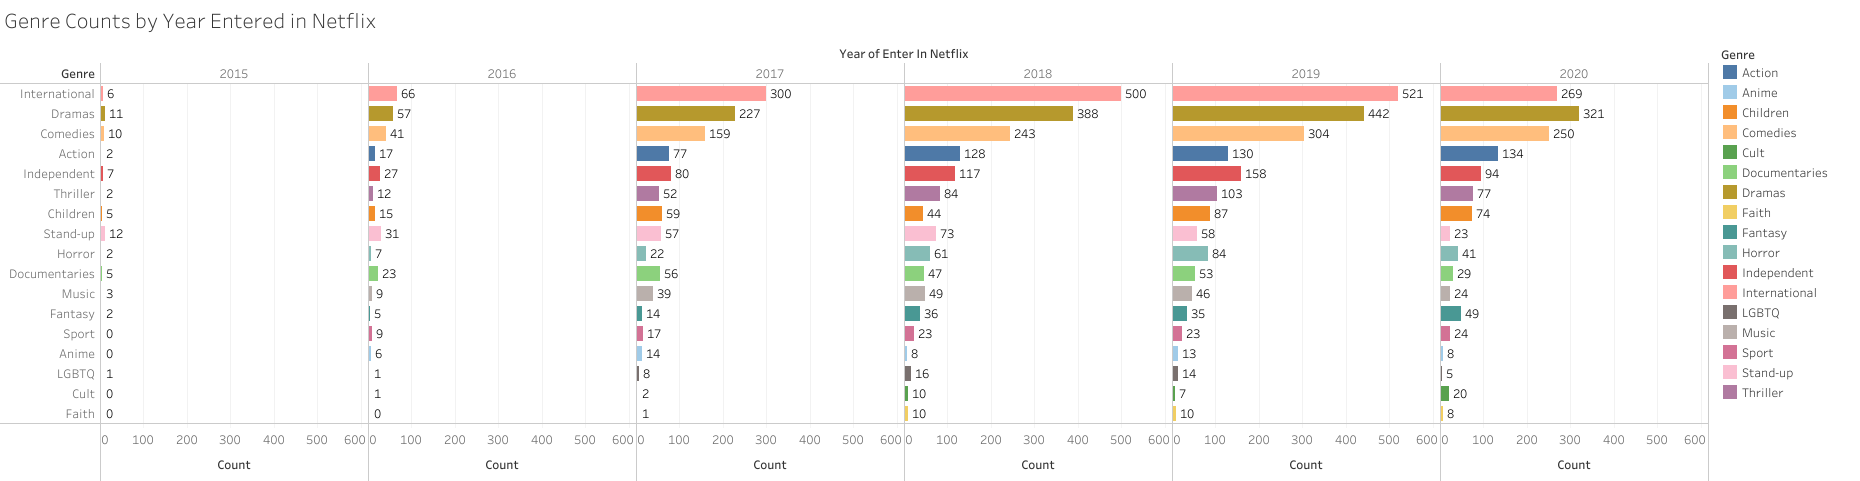